In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Data loading and first analysis

In [2]:
mat = pd.read_csv('student-por.csv', sep= ';')
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [3]:
mat.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649,NaN,NaN,NaN,16.7442,1.21814,15,16,17,18,22
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649,NaN,NaN,NaN,2.51464,1.13455,0,2,2,4,4
Fedu,649,NaN,NaN,NaN,2.30663,1.09993,0,1,2,3,4
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


no missing values

a lot of nominal variables with 2 distinct values. Seems that we can transform it to dummies

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


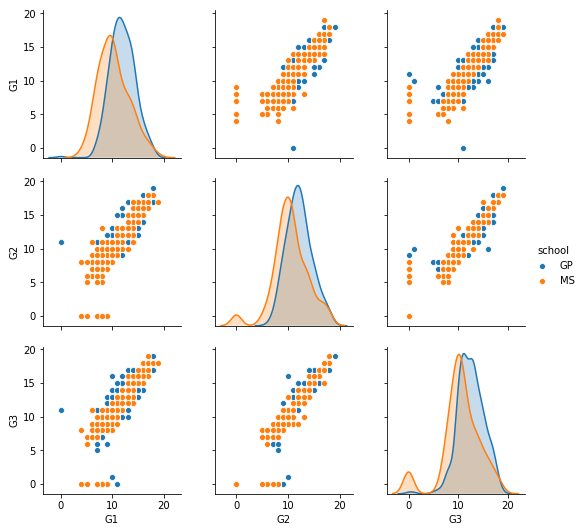

In [4]:
sns.pairplot(mat[['G1','G2','G3','school']], hue="school")

In [5]:
mat[((mat['G1'] > 0) & (mat['G2'] == 0)) | ((mat['G2'] > 0) & (mat['G3'] == 0))]['school'].value_counts()

MS    14
GP     1
Name: school, dtype: int64

Students from MS got 0 mark more frequently, than from MS (different result from mat.csv)

Ok, we need to predict G1, so variables G2,G3 should be deleted because they are from "future"

In [6]:
mat.drop("G2", axis=1, inplace=True)
mat.drop("G3", axis=1, inplace=True)
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,9
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,11
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,12
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,2,10
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,15
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,12


There are a lot of different features, let's devide them into groups 

In [7]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1'],
      dtype='object')

In [8]:
student_feat = ['sex', 'age', 'reason', 'nursery','higher','romantic' ]
place = ['school','address','traveltime','internet']
fam_feat = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian','famrel']
study_feat = ['studytime', 'failures','schoolsup', 'famsup', 'paid','activities']
study_style_feat = ['freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

In [9]:
len(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
'Walc', 'health', 'absences'])

30

In [10]:
#to check we didn't forget any variable
len(student_feat + place + fam_feat + study_feat + study_style_feat)

30

In [11]:
mat_student_feat = pd.get_dummies(mat[student_feat], drop_first=True)

In [12]:
pd.get_dummies(mat[place])

,traveltime,school_GP,school_MS,address_R,address_U,internet_no,internet_yes
0,2,1,0,0,1,1,0
1,1,1,0,0,1,0,1
2,1,1,0,0,1,0,1
3,1,1,0,0,1,0,1
4,1,1,0,0,1,1,0
5,1,1,0,0,1,0,1
6,1,1,0,0,1,0,1
7,2,1,0,0,1,1,0
8,1,1,0,0,1,0,1
9,1,1,0,0,1,0,1


In [13]:
mat_dummies = pd.get_dummies(mat)
mat_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [14]:
#drop k-th category for each variable 
mat_dummies.drop([ 'school_MS','sex_M','address_U','famsize_LE3','Pstatus_T',\
                  'Mjob_other','Fjob_other','reason_other','guardian_other',\
                 'schoolsup_no','famsup_no','paid_no','activities_no','nursery_no'\
                 ,'higher_no','internet_no','romantic_no'], axis=1, inplace=True)

In [15]:
mat_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1',
       'school_GP', 'sex_F', 'address_R', 'famsize_GT3', 'Pstatus_A',
       'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

## Vizualization part

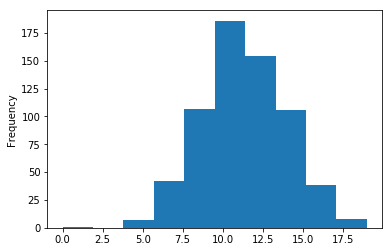

In [16]:
mat_dummies['G1'].plot(kind='hist',sharex=True)

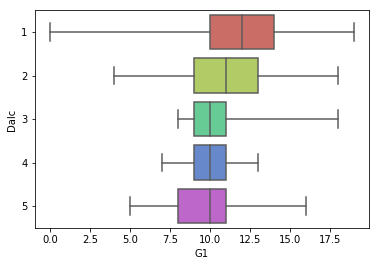

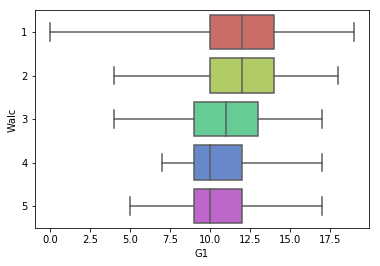

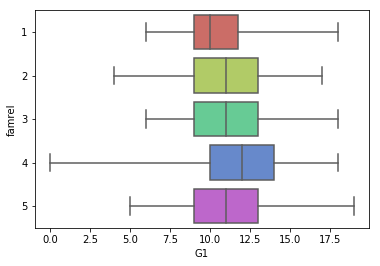

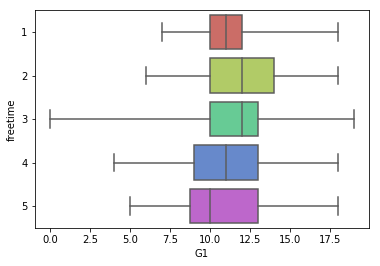

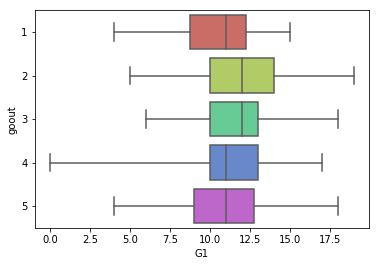

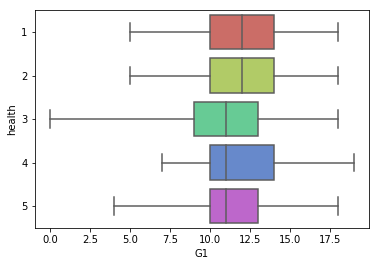

In [19]:
for var in ['Dalc','Walc','famrel','freetime','goout','health']:
    sns.boxplot(x=mat_dummies['G1'], y=mat_dummies[var],
            whis="range", palette="hls",orient='h')
    plt.show()

some conclusions:

* seems that there is no any correlations

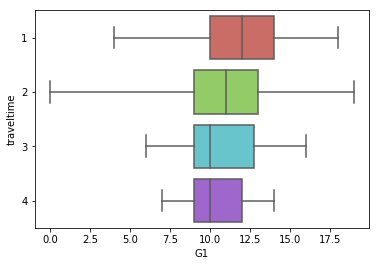

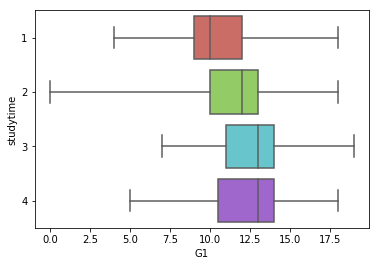

In [20]:
for var in ['traveltime','studytime']:
    sns.boxplot(x=mat_dummies['G1'], y=mat_dummies[var],
            whis="range", palette="hls",orient='h')
    plt.show()

some conclusions:

* lower traveltime - lower G1
* higher studytime - higher G1

In [17]:
vars_dummies_to_barchart = ['Pstatus_A','activities_yes','address_R','famsize_GT3','famsup_yes','higher_yes', 'internet_yes'\
                    , 'nursery_yes', 'paid_yes','romantic_yes', 'school_GP', 'schoolsup_yes', 'sex_F']

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


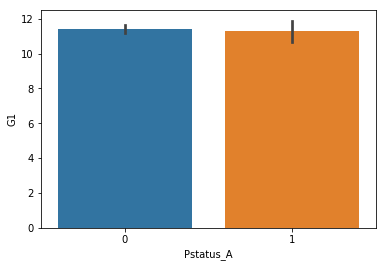

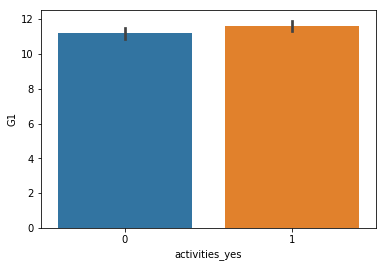

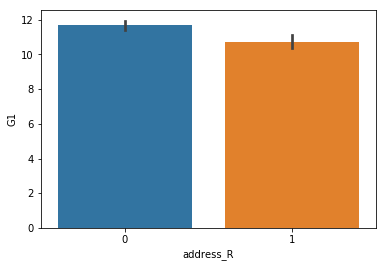

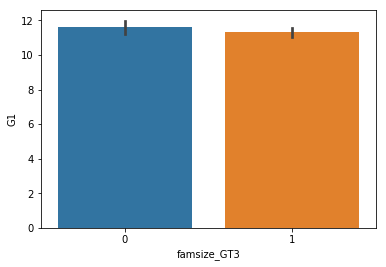

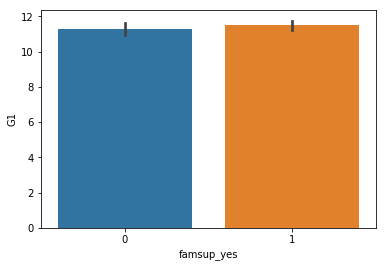

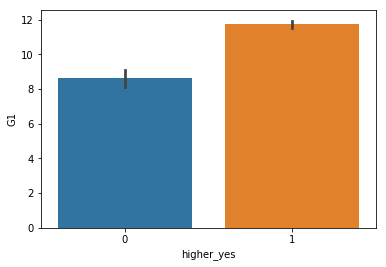

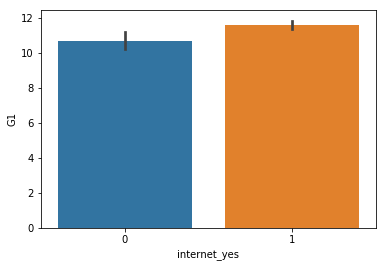

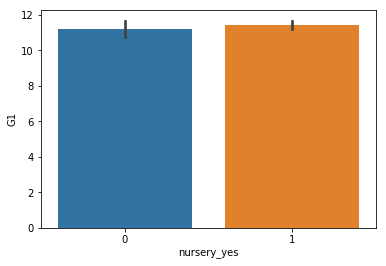

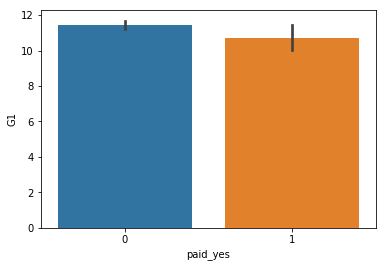

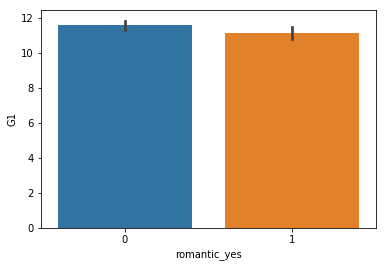

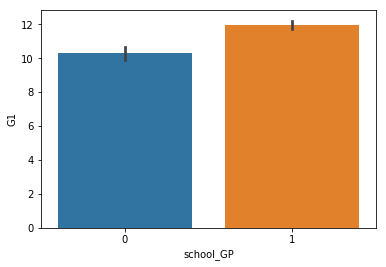

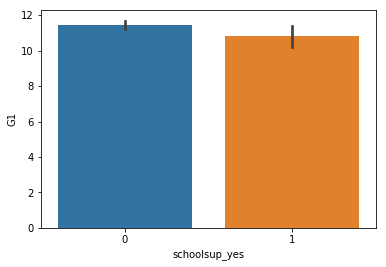

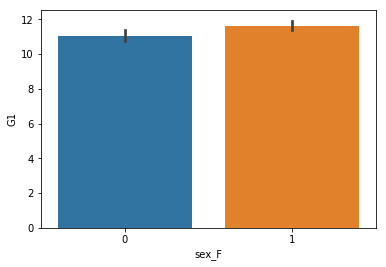

In [22]:
for var in vars_dummies_to_barchart:
    sns.barplot(x=mat_dummies[var], y=mat_dummies['G1'],orient='v')
    plt.show()

some conclusions:

* school GP shows higher G1 marks 
* for math it's important to have internet (avg G1 higher)
* students with thinking about higher degree leads to higher G1
* students with schoolsup = 1 have lower G1, because some low-skills students need additional support from school. Interesting thing that there isn't such correlation with "Family support". 

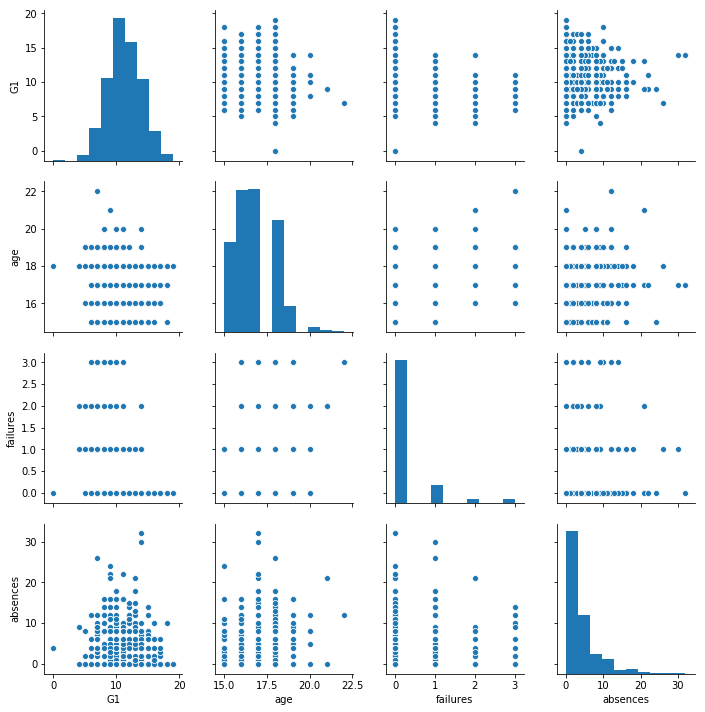

In [23]:
sns.pairplot(mat_dummies[['G1','age', 'failures','absences']])

some conclusions:

* absences doesn't affect on G1 (surprisingly)
* more number of failures leads to less G1

## Modelling part

### Let's make lasso regression for variable selection

In [18]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01,random_state=18)
reg_lasso.fit(mat_dummies[mat_dummies.columns.difference(['G1'])],mat_dummies['G1']) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=18,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
print('Variance score: %.2f' % r2_score(mat_dummies['G1'], reg_lasso.predict(mat_dummies[mat_dummies.columns.difference(['G1'])])))

Variance score: 0.36


In [28]:
coef_lasso = pd.DataFrame(data=[mat_dummies[mat_dummies.columns.difference(['G1'])].columns, reg_lasso.coef_]).T
coef_lasso.columns=['variable','coef']

In [29]:
coef_lasso.sort_values(by=['coef'],ascending=False)

,variable,coef
26,higher_yes,1.41928
34,school_GP,1.15903
5,Fjob_teacher,0.741453
36,sex_F,0.448411
37,studytime,0.388867
23,guardian_father,0.247421
32,reason_reputation,0.204377
14,activities_yes,0.190483
6,Medu,0.149568
27,internet_yes,0.0842016


variables *Fjob_health* *goout* *Mjob_services* have  coef ~ 0, so we can remove them from next modelling part

## Ridge regression

In [20]:
vars_to_remove = ['Fjob_health', 'goout', 'Mjob_services']

In [21]:
vars_to_remove.append('G1')

In [22]:
from sklearn import linear_model
reg_ridge = linear_model.Ridge(alpha=2,random_state=18)
reg_ridge.fit(mat_dummies[mat_dummies.columns.difference(vars_to_remove)],mat_dummies['G1']) 

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=18, solver='auto', tol=0.001)

In [23]:
print('Variance score: %.2f' % r2_score(mat_dummies['G1'], reg_ridge.predict(mat_dummies[mat_dummies.columns.difference(vars_to_remove)])))

Variance score: 0.36


In [24]:
coef_ridge = pd.DataFrame(data=[mat_dummies[mat_dummies.columns.difference(vars_to_remove)].columns, reg_ridge.coef_]).T
coef_ridge.columns=['variable','coef']

In [25]:
coef_ridge.sort_values(by=['coef'],ascending=False)

,variable,coef
23,higher_yes,1.43989
31,school_GP,1.12916
4,Fjob_teacher,0.876192
33,sex_F,0.524296
34,studytime,0.398458
29,reason_reputation,0.295985
12,activities_yes,0.236751
20,guardian_father,0.22845
7,Mjob_health,0.190968
8,Mjob_teacher,0.17659


C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


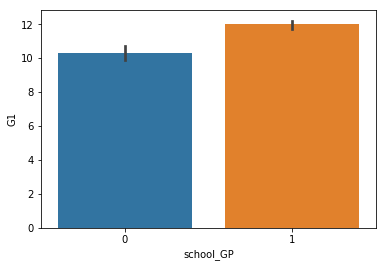

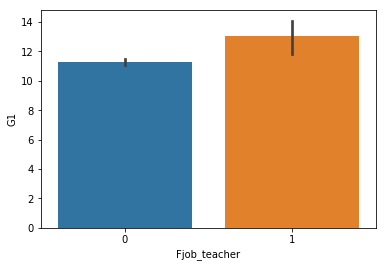

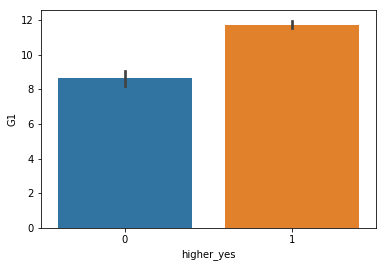

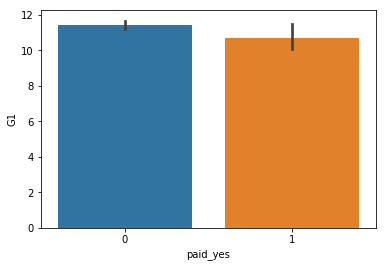

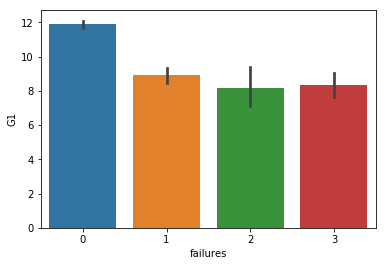

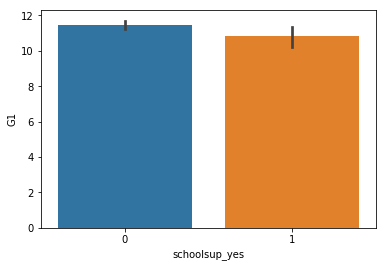

In [39]:
for var in ['school_GP','Fjob_teacher','higher_yes','paid_yes','failures','schoolsup_yes']:
    sns.barplot(x=mat_dummies[var], y=mat_dummies['G1'],orient='v')
    plt.show()

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


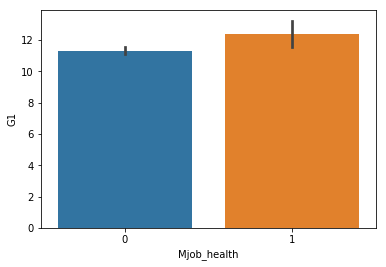

In [40]:
sns.barplot(x=mat_dummies['Mjob_health'], y=mat_dummies['G1'],orient='v')
plt.show()

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


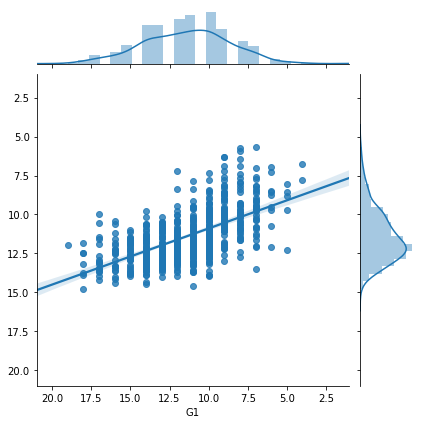

In [42]:
sns.jointplot(mat_dummies['G1'], reg_ridge.predict(mat_dummies[mat_dummies.columns.difference(vars_to_remove)]),xlim=21, ylim=21, kind='reg' )

In [44]:
data_for_analysis = mat_dummies.copy()
data_for_analysis['reg_pred'] = reg_ridge.predict(data_for_analysis[data_for_analysis.columns.difference(vars_to_remove)])

In [45]:
vars_to_remove.append('reg_pred')

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


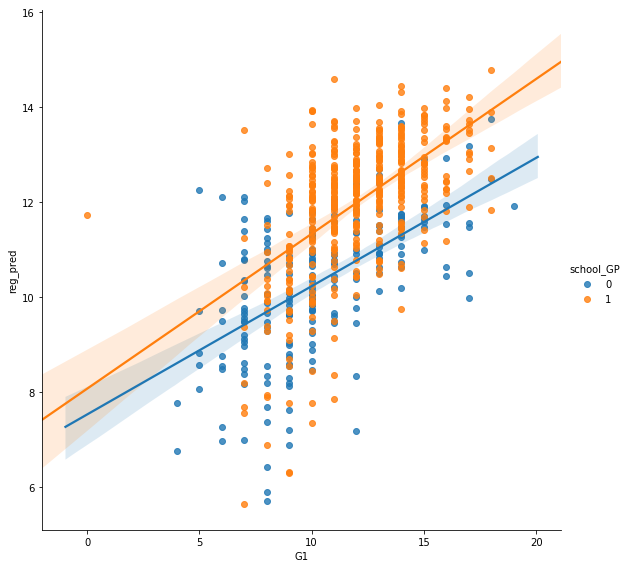

In [46]:
sns.lmplot(x='G1', y='reg_pred', data=data_for_analysis, hue='school_GP',aspect=1,height=8)

In [47]:
print('Variance score for GP: %.2f' % r2_score(data_for_analysis[data_for_analysis['school_GP'] == 1]['G1'], data_for_analysis[data_for_analysis['school_GP'] == 1]['reg_pred']))

Variance score for GP: 0.30


In [48]:
print('Variance score for MS: %.2f' % r2_score(data_for_analysis[data_for_analysis['school_GP'] == 0]['G1'], data_for_analysis[data_for_analysis['school_GP'] == 0]['reg_pred']))

Variance score for MS: 0.31


## Random Forest
### Dataset have a lot of categorical variables, so maybe tree-based algorythms can improve the score

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
vars_to_remove

['Fjob_health', 'goout', 'Mjob_services', 'G1', 'reg_pred']

In [51]:
#there are not too much observations in our dataset, so test data should be more than 10%. I take 40%
X_train, X_test, y_train, y_test = train_test_split(mat_dummies[mat_dummies.columns.difference(vars_to_remove)], mat_dummies['G1'], test_size=0.4, random_state=18)

In [52]:
reg_rf = RandomForestRegressor(max_depth=3
                               ,n_estimators=10
                               ,max_features='log2'
                               ,criterion='mse'
                               ,min_samples_split=15
                               , random_state=18)

In [53]:
reg_rf.fit(X_train, y_train)
print('Variance score TRAIN: %.2f' % reg_rf.score(X_train, y_train))
print('Variance score TEST: %.2f' % reg_rf.score(X_test, y_test))

Variance score TRAIN: 0.33
Variance score TEST: 0.20


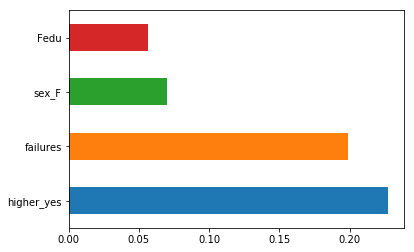

In [54]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

## Decision tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

On train dataset we see that tree with "max_depth=6" is closer, than "max_depth=3". Let's check it with test dataset

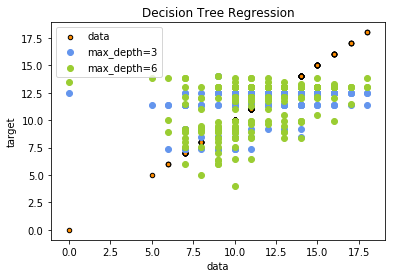

In [56]:
# Fit regression model
reg_tree1 = DecisionTreeRegressor(max_depth=3)
reg_tree2 = DecisionTreeRegressor(max_depth=6)
reg_tree1.fit(X_train, y_train)
reg_tree2.fit(X_train, y_train)

# Predict
y_1 = reg_tree1.predict(X_test)
y_2 = reg_tree2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(y_test, y_test, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.scatter(y_test, y_1, color="cornflowerblue", label="max_depth=3")
plt.scatter(y_test, y_2, color="yellowgreen", label="max_depth=6")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

On test dataset we another picture. Tree with max_depth = 6 is overfitted and this is the reason why on test dataset it shows worse results. Let's prove it by r2 score

In [58]:
print('Variance score of 3 depth tree on TRAIN : %.2f' % reg_tree1.score(X_train, y_train))
print('Variance score of 3 depth tree on TEST : %.2f' % reg_tree1.score(X_test, y_test))

print('Variance score of 6 depth tree on TRAIN : %.2f' % reg_tree2.score(X_train, y_train))
print('Variance score of 6 depth tree on TEST : %.2f' % reg_tree2.score(X_test, y_test))

Variance score of 3 depth tree on TRAIN : 0.35
Variance score of 3 depth tree on TEST : 0.16
Variance score of 6 depth tree on TRAIN : 0.58
Variance score of 6 depth tree on TEST : 0.02


In [59]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source

In [60]:
graph = Source(tree.export_graphviz(reg_tree1,out_file='reg_tree2',
                                    rounded=True,proportion = True,
                                    feature_names = X_train.columns, 
                                    precision  = 2,
                                    filled = True                         
                                   )
              )

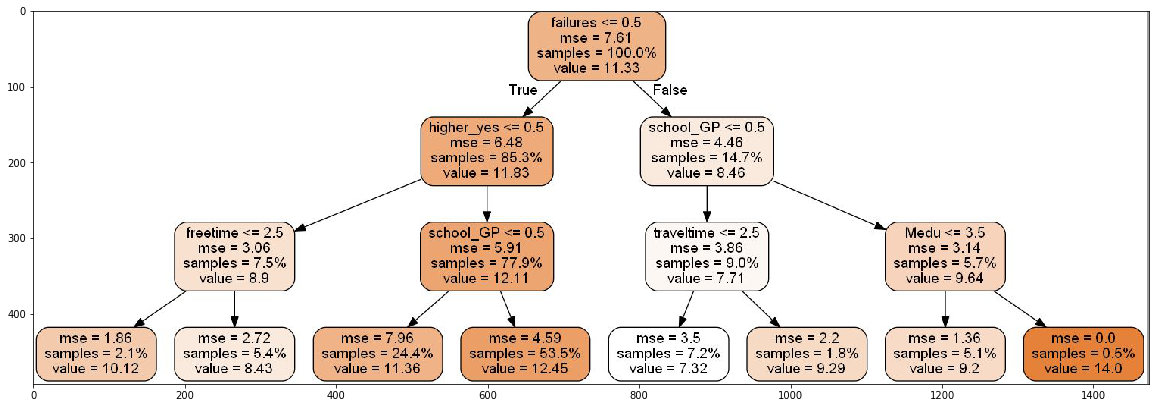

In [61]:
from pylab import imread,subplot,imshow,show
plt.figure(figsize=(20,10))
image = imread('tree2.jpg')
plt.imshow(image)

So we found segments where  our prediction is quite good (mse <5)

* the top variable (in tree) is "failures".
* model works better for GP school (we can see it after different of MSE's after separation by school_GP)
* for 6 leafs MSE less than 3.5
* 1 leaf of 53.5% volume has 4.6 MSE, which is quite good result

C:\Users\Den\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


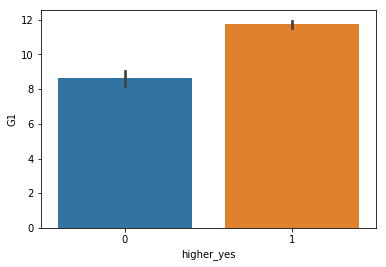

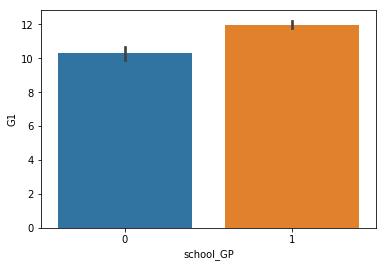

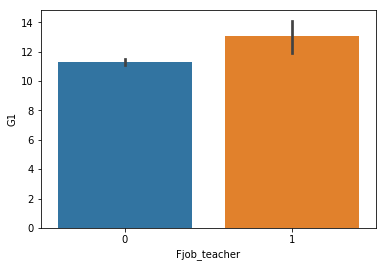

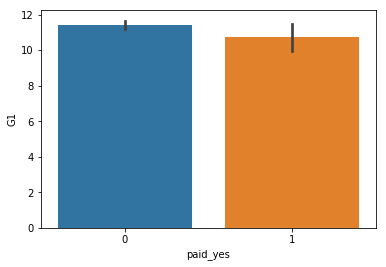

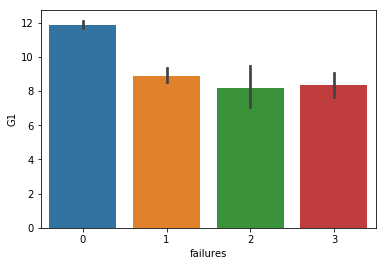

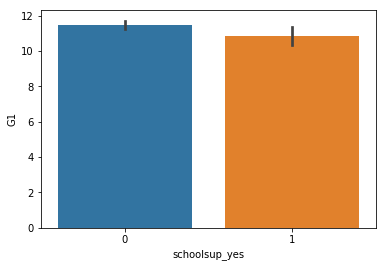

In [63]:
for var in ['higher_yes','school_GP','Fjob_teacher','paid_yes','failures','schoolsup_yes']:
    sns.barplot(x=mat_dummies[var], y=mat_dummies['G1'],orient='v')
    plt.show()

Conclusions:

* students with idea about higher degree have higher G1
* school_GP has higher G1
* Father job is teacher leads to higher G1
* and, as usual students with 0 failures have higher G1 

## Alcohol sales

In [26]:
mat_dummies

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_father,guardian_mother,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,1,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,0,1,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,0,1,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,0,1,0,1,0,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,1,1,1,0


alcohol consimption is prohibitted for students less 16 years

In [31]:
from sklearn import linear_model
reg_ridge_alc = linear_model.Ridge(alpha=2,random_state=18)
reg_ridge_alc.fit(mat_dummies[mat_dummies.columns.difference(['G1','Dalc','Walc'])],mat_dummies['Walc']) 

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=18, solver='auto', tol=0.001)

In [32]:
coef_ridge_alc = pd.DataFrame(data=[mat_dummies[mat_dummies.columns.difference(['G1','Dalc'])].columns, reg_ridge_alc.coef_]).T
coef_ridge_alc.columns=['variable','coef']

coef_ridge_alc.sort_values(by=['coef'],ascending=False)

,variable,coef
20,freetime,0.41939
9,Mjob_teacher,0.313931
21,goout,0.272408
3,Fjob_services,0.215689
22,guardian_father,0.203801
6,Mjob_at_home,0.145209
27,nursery_yes,0.132711
7,Mjob_health,0.118642
23,guardian_mother,0.100019
0,Fedu,0.0992124


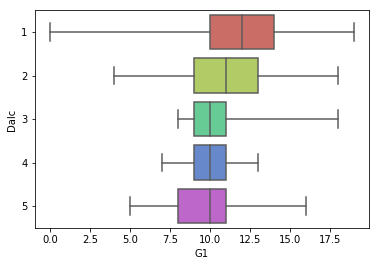

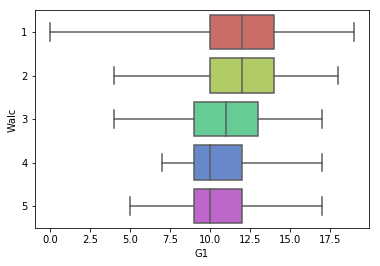

In [70]:
for var in ['Dalc','Walc']:
    sns.boxplot(x=mat_dummies['G1'], y=mat_dummies[var],
            whis="range", palette="hls",orient='h')
    plt.show()

Conclusions about alcohol sales:

* There isn't any student with Walc > 1 and G1 less than 4 points.
* Regression analysis shows that freetime and goout variables have positive coefficients, so alcohol sellers should promote spending time with friends, for instance